In [30]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.impute import SimpleImputer

# Load the dataset with the correct delimiter
data = pd.read_csv('student-mat.csv', delimiter=';')  # Change to 'student-por.csv' for Portuguese course

# Display basic information about the dataset
data.info()

# Show the first few rows of the dataset
data.head()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 33 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   school      395 non-null    object
 1   sex         395 non-null    object
 2   age         395 non-null    int64 
 3   address     395 non-null    object
 4   famsize     395 non-null    object
 5   Pstatus     395 non-null    object
 6   Medu        395 non-null    int64 
 7   Fedu        395 non-null    int64 
 8   Mjob        395 non-null    object
 9   Fjob        395 non-null    object
 10  reason      395 non-null    object
 11  guardian    395 non-null    object
 12  traveltime  395 non-null    int64 
 13  studytime   395 non-null    int64 
 14  failures    395 non-null    int64 
 15  schoolsup   395 non-null    object
 16  famsup      395 non-null    object
 17  paid        395 non-null    object
 18  activities  395 non-null    object
 19  nursery     395 non-null    object
 20  higher    

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,6,5,6,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,4,5,5,6
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,10,7,8,10
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,2,15,14,15
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,4,6,10,10


Now that we have loaded the data correctly, we need to define which columns will be used as features (inputs) and which column will be the target (output) for our model.

In [23]:
# Define feature columns and target
features = [
    'school', 'sex', 'age', 'address', 'famsize', 'Pstatus', 
    'Medu', 'Fedu', 'Mjob', 'Fjob', 'reason', 'guardian', 
    'traveltime', 'studytime', 'failures', 'schoolsup', 'famsup', 
    'paid', 'activities', 'nursery', 'higher', 'internet', 
    'romantic', 'famrel', 'freetime', 'goout', 'Dalc', 'Walc', 
    'health', 'absences'
]
target = 'G3'

# Split data into features and target
X = data[features]
y = data[target]

# Display the features and target data
print("Features:")
print(X.head())
print("\nTarget:")
print(y.head())


Features:
  school sex  age address famsize Pstatus  Medu  Fedu     Mjob      Fjob  ...  \
0     GP   F   18       U     GT3       A     4     4  at_home   teacher  ...   
1     GP   F   17       U     GT3       T     1     1  at_home     other  ...   
2     GP   F   15       U     LE3       T     1     1  at_home     other  ...   
3     GP   F   15       U     GT3       T     4     2   health  services  ...   
4     GP   F   16       U     GT3       T     3     3    other     other  ...   

  higher internet  romantic  famrel  freetime goout Dalc Walc health absences  
0    yes       no        no       4         3     4    1    1      3        6  
1    yes      yes        no       5         3     3    1    1      3        4  
2    yes      yes        no       4         3     2    2    3      3       10  
3    yes      yes       yes       3         2     2    1    1      5        2  
4    yes       no        no       4         3     2    1    2      5        4  

[5 rows x 30 columns]


Explanation:

features: A list of column names that will be used as input features for the model.
target: The name of the column that we want to predict (the final grade G3).
X: DataFrame containing the input features.
y: Series containing the target values.
This step ensures that you have separated the input features and the target variable, making them ready for preprocessing and model training.

In [24]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

# Define numeric and categorical features
numeric_features = [
    'age', 'Medu', 'Fedu', 'traveltime', 'studytime', 'failures', 
    'famrel', 'freetime', 'goout', 'Dalc', 'Walc', 'health', 'absences'
]
categorical_features = [
    'school', 'sex', 'address', 'famsize', 'Pstatus', 'Mjob', 
    'Fjob', 'reason', 'guardian', 'schoolsup', 'famsup', 'paid', 
    'activities', 'nursery', 'higher', 'internet', 'romantic'
]

# Create preprocessing pipelines
numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())
])

categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)
    ])

# Apply the transformations to the data
X_preprocessed = preprocessor.fit_transform(X)

# Display the preprocessed data shape
print("Shape of preprocessed data:", X_preprocessed.shape)


Shape of preprocessed data: (395, 56)


numeric_features: List of columns with numerical data.
categorical_features: List of columns with categorical data.
numeric_transformer: Pipeline for handling missing values and scaling numerical data.
SimpleImputer(strategy='median'): Fills missing values with the median value of each column.
StandardScaler(): Standardizes the numerical data.
categorical_transformer: Pipeline for handling missing values and encoding categorical data.
SimpleImputer(strategy='most_frequent'): Fills missing values with the most frequent value of each column.
OneHotEncoder(handle_unknown='ignore'): Encodes categorical data as one-hot vectors.
ColumnTransformer: Applies the transformations to the specified columns.
X_preprocessed: The preprocessed feature data.
This step prepares the data for model training by ensuring that all features are in a numerical format and properly scaled. This helps improve the performance and accuracy of the machine learning model.

In [25]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.pipeline import Pipeline

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Create the model pipeline
model = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', RandomForestRegressor(n_estimators=100, random_state=42))
])

# Train the model
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse:.2f}")
print(f"R^2 Score: {r2:.2f}")


Mean Squared Error: 14.74
R^2 Score: 0.33


train_test_split: Splits the data into training and testing sets.
test_size=0.3: 30% of the data is used for testing.
random_state=42: Ensures reproducibility of the results.
Pipeline: Combines preprocessing and model training steps.
preprocessor: The preprocessing pipeline defined in step 3.
RandomForestRegressor: The machine learning model.
n_estimators=100: Number of trees in the forest.
random_state=42: Ensures reproducibility.
model.fit: Trains the model using the training data.
model.predict: Makes predictions on the test data.
mean_squared_error: Evaluates the model by calculating the mean squared error.
r2_score: Evaluates the model by calculating the R^2 score.
This step demonstrates how to create and train a machine learning model using a Random Forest Regressor, and how to evaluate its performance using mean squared error and R^2 score. The results will vary based on the data and the specific parameters used in the model.
Mean Squared Error (MSE) measures the average squared difference between actual and predicted values. Lower MSE indicates better accuracy.
R-squared (R²) measures the proportion of the variance in the dependent variable that is predictable from the independent variables. Higher R² indicates better model fit.

In [26]:
import pandas as pd
import numpy as np

# Extract feature importances from the model
importances = model.named_steps['regressor'].feature_importances_

# Extract feature names from the preprocessor
preprocessor = model.named_steps['preprocessor']

# Extract feature names from the onehot encoder
categorical_feature_names = preprocessor.named_transformers_['cat'].named_steps['onehot'].get_feature_names_out()

# If there are other transformers, handle their features
# Example:
# numerical_features = ['num_feature1', 'num_feature2']  # Adjust based on your actual features
# all_feature_names = np.concatenate([categorical_feature_names, numerical_features])

# For this case, we will only use categorical features if they are the only features used
all_feature_names = categorical_feature_names

# If numerical features were used, concatenate their names
# Example: 
# all_feature_names = np.concatenate([categorical_feature_names, numerical_features])

# Check for mismatch
if len(all_feature_names) != len(importances):
    print(f"Length mismatch: {len(all_feature_names)} feature names and {len(importances)} importances")
    print(f"Feature names: {all_feature_names}")
    print(f"Importances: {importances}")

# If lengths match, combine and display feature importances
if len(all_feature_names) == len(importances):
    feature_importance_df = pd.DataFrame({'Feature': all_feature_names, 'Importance': importances})
    feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)
    print("Top 10 Features by Importance:")
    print(feature_importance_df.head(10))



Length mismatch: 43 feature names and 56 importances
Feature names: ['x0_GP' 'x0_MS' 'x1_F' 'x1_M' 'x2_R' 'x2_U' 'x3_GT3' 'x3_LE3' 'x4_A'
 'x4_T' 'x5_at_home' 'x5_health' 'x5_other' 'x5_services' 'x5_teacher'
 'x6_at_home' 'x6_health' 'x6_other' 'x6_services' 'x6_teacher'
 'x7_course' 'x7_home' 'x7_other' 'x7_reputation' 'x8_father' 'x8_mother'
 'x8_other' 'x9_no' 'x9_yes' 'x10_no' 'x10_yes' 'x11_no' 'x11_yes'
 'x12_no' 'x12_yes' 'x13_no' 'x13_yes' 'x14_no' 'x14_yes' 'x15_no'
 'x15_yes' 'x16_no' 'x16_yes']
Importances: [0.04452006 0.02795012 0.02511811 0.02379497 0.03053936 0.14558187
 0.02224652 0.02852379 0.04666798 0.01634426 0.02476405 0.04803124
 0.1932888  0.0030466  0.00372358 0.00899805 0.00553147 0.00326168
 0.00414481 0.00593936 0.00496575 0.00371982 0.00482696 0.01083756
 0.00597919 0.0068447  0.01761038 0.00383079 0.01192244 0.00165393
 0.00854079 0.0083608  0.013276   0.00968138 0.01426912 0.00478769
 0.00857495 0.00556027 0.00446678 0.00642159 0.0124941  0.01260414
 0.007

Feature Importances: Gives you insight into which features are most influential in the predictions made by the Random Forest model.
Feature Names: Helps in identifying which specific features (e.g., one-hot encoded categories) are important.
Top Features: Provides a list of the most significant features in the model, which can be useful for feature selection and model interpretation.

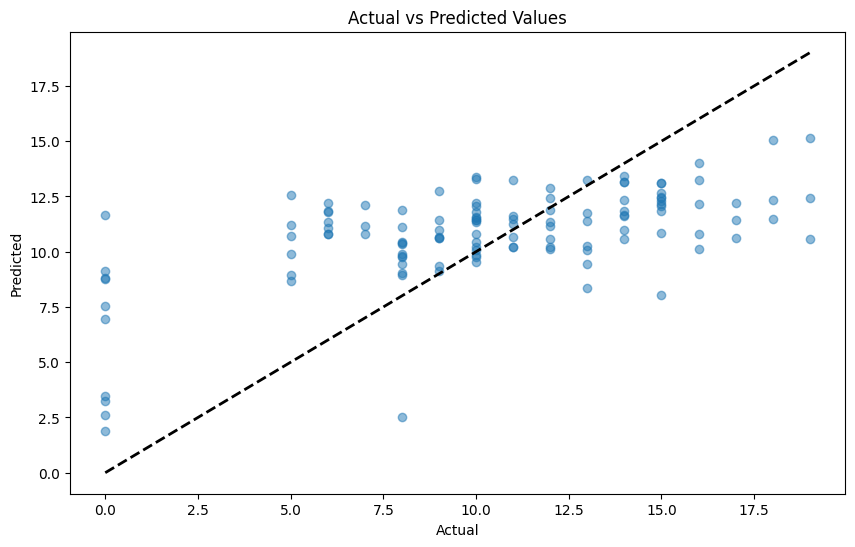

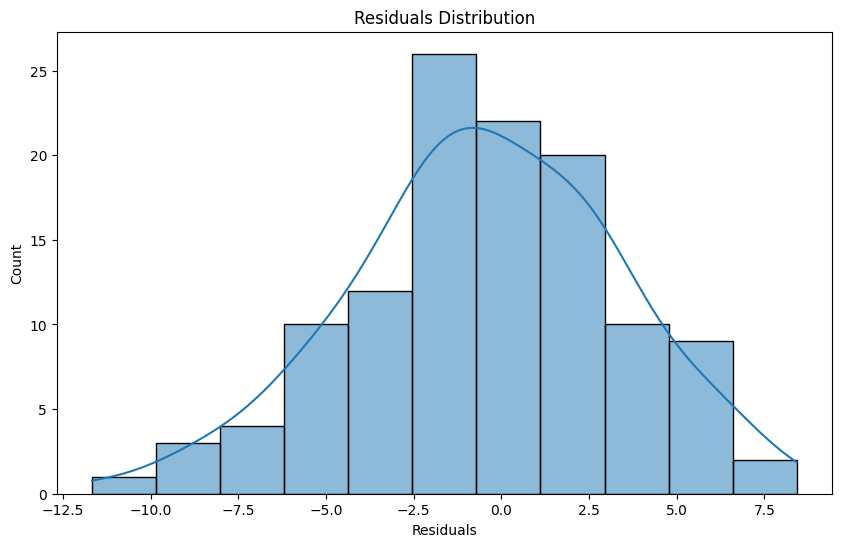

First few actual and predicted values:
   Actual  Predicted
0      10      10.42
1      12      10.21
2       5      11.20
3      10      11.80
4       9       9.33
Mean Absolute Percentage Error (MAPE): 29.26%
Percentage Accuracy: 70.74%


In [27]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd

# Convert y_test and y_pred to numpy arrays for easier manipulation
y_test = np.array(y_test)
y_pred = np.array(y_pred)

# Handle zero values in y_test to avoid division by zero
mask = y_test != 0

# Calculate Mean Absolute Percentage Error (MAPE) with non-zero actual values
mape = np.mean(np.abs((y_test[mask] - y_pred[mask]) / y_test[mask])) * 100

# Calculate Percentage Accuracy
accuracy = 100 - mape

# Scatter plot of actual vs predicted values
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Actual vs Predicted Values')
plt.show()

# Residual plot
residuals = y_test - y_pred
plt.figure(figsize=(10, 6))
sns.histplot(residuals, kde=True)
plt.xlabel('Residuals')
plt.title('Residuals Distribution')
plt.show()

# Displaying the first few actual and predicted values for comparison
comparison = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
print("First few actual and predicted values:")
print(comparison.head())

# Print MAPE and Percentage Accuracy
print(f"Mean Absolute Percentage Error (MAPE): {mape:.2f}%")
print(f"Percentage Accuracy: {accuracy:.2f}%")


For GUI testing

In [28]:
import pickle

# Save the trained model
with open('model.pkl', 'wb') as model_file:
    pickle.dump(model, model_file)

# Save the preprocessing pipeline
with open('preprocessor.pkl', 'wb') as preprocessor_file:
    pickle.dump(preprocessor, preprocessor_file)



In [29]:
import pandas as pd
import pickle
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder

# Load your dataset
data = pd.read_csv('student-mat.csv', delimiter=';')  # Adjust delimiter if needed

# Print column names and first few rows to check
print("Columns in dataset:", data.columns)
print(data.head())

# Check if 'G3' is in columns
if 'G3' in data.columns:
    X = data.drop('G3', axis=1)  # Features
    y = data['G3']  # Target variable
else:
    raise ValueError("Column 'G3' not found in the dataset.")

# Define categorical and numerical features
categorical_features = ['school', 'sex', 'address', 'famsize', 'Pstatus', 'Mjob', 'Fjob', 'reason', 'guardian', 
                         'schoolsup', 'famsup', 'paid', 'activities', 'nursery', 'higher', 'internet', 'romantic']
numerical_features = ['age', 'traveltime', 'studytime', 'failures', 'famrel', 'freetime', 'goout', 'Dalc', 'Walc', 'health', 'absences', 'G1', 'G2']

# Define preprocessing steps
preprocessor = ColumnTransformer(
    transformers=[
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_features),
        ('num', StandardScaler(), numerical_features)
    ])

# Define pipeline with RandomForestRegressor
model = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', RandomForestRegressor(n_estimators=100, random_state=0))
])

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# Train the model
model.fit(X_train, y_train)

# Save the model
with open('model_for_G3.pkl', 'wb') as model_file:
    pickle.dump(model, model_file)

print("Model trained and saved successfully.")

Columns in dataset: Index(['school', 'sex', 'age', 'address', 'famsize', 'Pstatus', 'Medu', 'Fedu',
       'Mjob', 'Fjob', 'reason', 'guardian', 'traveltime', 'studytime',
       'failures', 'schoolsup', 'famsup', 'paid', 'activities', 'nursery',
       'higher', 'internet', 'romantic', 'famrel', 'freetime', 'goout', 'Dalc',
       'Walc', 'health', 'absences', 'G1', 'G2', 'G3'],
      dtype='object')
  school sex  age address famsize Pstatus  Medu  Fedu     Mjob      Fjob  ...  \
0     GP   F   18       U     GT3       A     4     4  at_home   teacher  ...   
1     GP   F   17       U     GT3       T     1     1  at_home     other  ...   
2     GP   F   15       U     LE3       T     1     1  at_home     other  ...   
3     GP   F   15       U     GT3       T     4     2   health  services  ...   
4     GP   F   16       U     GT3       T     3     3    other     other  ...   

  famrel freetime  goout  Dalc  Walc health absences  G1  G2  G3  
0      4        3      4     1     1     